In the Data folder file I showed that t>20 basically corresponds to noise. Here I want to check if the network performance improves if I throw out this noise.

In [1]:
import os
import sys

os.environ["CUDA_VISIBLE_DEVICES"]= '0' #, this way I would choose GPU 3 to do the work

import torch
import numpy as np
import time
import h5py
import matplotlib.pyplot as plt
from scipy.ndimage import zoom # for compressing images / only for testing purposes to speed up NN training
from scipy.fft import fft2, fftshift
from scipy.io import loadmat
from torch.utils.data import DataLoader, Subset
import torch.optim as optim
import torch.nn as nn

from ipyfilechooser import FileChooser
from IPython.display import display
import ipywidgets as widgets
from IPython.display import display

sys.path.append('../scripts')
sys.path.append('../models')

from sklearn.model_selection import train_test_split
import sys
from scipy.ndimage import rotate
import math
import random
from output_statistics import *
import subprocess
import os
import glob

from tensorboard.backend.event_processing import event_accumulator

dimensions = 22 # for data reduction
trancuate_t = 96 # set this parameter to control at which time step you stop using the signal
import plotly.graph_objects as go
k = 1 # Set how many subsequent time steps you want to give to the network at once. Values allowed: 1, 2, 4, 8 (because it has to divide 8)

from ipyfilechooser import FileChooser
from IPython.display import display

In [9]:
#### give names to the models you want displayed, run this cell to select models to be compared

top_directory= '../log_files/'


Model_1 = "AF5"
Model_2 = "AF4"

# Create a file chooser widget, pointing to your root directory (adjust as needed)
fc = FileChooser(top_directory)
fc.use_dir_icons = True
display(fc)

# Create a file chooser widget, pointing to your root directory (adjust as needed)
fc_2 = FileChooser(top_directory)
fc_2.use_dir_icons = True
display(fc_2)

FileChooser(path='/home/jovyan/work/hfish/Deuterium_Reconstruction/log_files', filename='', title='', show_hid…

FileChooser(path='/home/jovyan/work/hfish/Deuterium_Reconstruction/log_files', filename='', title='', show_hid…

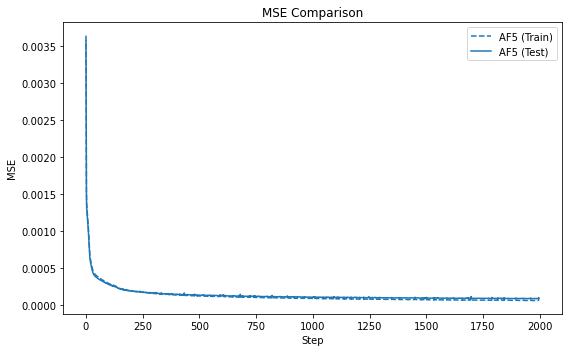

In [61]:
test = True# display test error
train = True # display train error

# logdirs = [fc.selected, fc_2.selected]
# labels = [Model_1, Model_2]


logdirs = [fc.selected]

labels = [Model_1]

# You can define the metrics you want to compare. For example:
my_metrics = [
    ("Loss Train",      "Loss/Train"),
    #("Loss Validation", "Loss/Validation"),
    ("Loss Test",       "Loss/Test")
]

compare_models(
    logdirs=logdirs,
    model_labels=labels,   #SSIM Train     Loss/Test
# logdir = fc_3.selected

# # Load the experiment data
# ea = event_accumulator.EventAccumulator(logdir)
# ea.Reload()  # Loads the log data

# loss_data = {}

#     # Extract Train Loss
# if "Loss/Train" in ea.Tags()['scalars']:
#     loss_train = ea.Scalars("Loss/Train")
#     loss_data["Loss/Train"] = [(x.step, x.value) for x in loss_train]

#     # Extract Test Loss
# if "Loss/Test" in ea.Tags()['scalars']:
#     loss_test = ea.Scalars("Loss/Test")
#     loss_data["Loss/Test"] = [(x.step, x.value) for x in loss_test]
    
# loss_testw[0:]
    metrics=my_metrics,
    figsize=(8, 5),
    train=train,
    test=test
)

9.08054644241929e-05


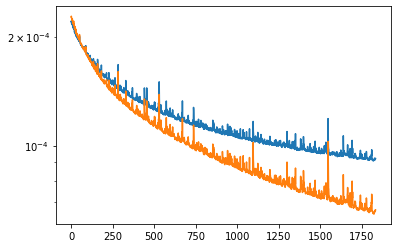

In [59]:
Inspect = "Loss/Test"   #SSIM Train     Loss/Test
logdir = fc.selected

# Load the experiment data
ea = event_accumulator.EventAccumulator(logdir)
ea.Reload()  # Loads the log data

loss_data = {}

    # Extract Train Loss
if "Loss/Train" in ea.Tags()['scalars']:
    loss_train = ea.Scalars("Loss/Train")
    loss_data["Loss/Train"] = [(x.step, x.value) for x in loss_train]

    # Extract Test Loss
if "Loss/Test" in ea.Tags()['scalars']:
    loss_test = ea.Scalars("Loss/Test")
    loss_data["Loss/Test"] = [(x.step, x.value) for x in loss_test]
    
loss_test #loss_train, loss_test
values_test = [entry.value for entry in loss_test]
values_train = [entry.value for entry in loss_train]

cut = 150
plt.plot(values_test[cut:])
plt.plot(values_train[cut:])
plt.yscale("log")


print(min(values_test))

In [60]:
values_test[-1]

9.211949509335682e-05

6.892024975968525e-05


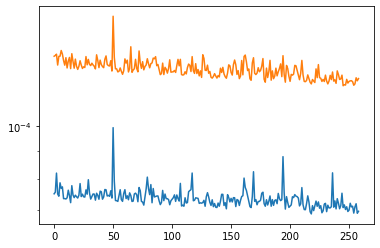

In [38]:
Inspect = "Loss/Test"   #SSIM Train     Loss/Test
logdir = fc_2.selected

# Load the experiment data
ea = event_accumulator.EventAccumulator(logdir)
ea.Reload()  # Loads the log data

loss_data = {}
values_test
    # Extract Train Loss
if "Loss/Train" in ea.Tags()['scalars']:
    loss_train = ea.Scalars("Loss/Train")
    loss_data["Loss/Train"] = [(x.step, x.value) for x in loss_train]

    # Extract Test Loss
if "Loss/Test" in ea.Tags()['scalars']:
    loss_test = ea.Scalars("Loss/Test")
    loss_data["Loss/Test"] = [(x.step, x.value) for x in loss_test]
    
loss_test #loss_train, loss_test
values_test = [entry.value for entry in loss_test]
values_train = [entry.value for entry in loss_train]

cut = 0
plt.plot(values_test[cut:])
plt.plot(values_train[cut:])
plt.yscale("log")


print(min(values_test))
#values_test